# **Introduction**

Over the past twenty years, the NBA has undergone a scoring revolution. This has been driven by the simple maxim: three is greater than two. As three point shooting has gone up, scoring and pace has followed. This has led to a total reimagining of offenses, defenses, and what type of players are most impactful.

The focus of this project is applying machine learning techniques to evaluate the relationship between basketball statistics and team performance. Specifically, the dataset includes features like field goals attempted, three-point percentages, pace, and other advanced statistics to predict a team's win percentage. Multiple regression models, including Linear Regression, Decision Tree, and Random Forest, are employed to assess their predictive performance. The results provide insights into the importance of each feature, helping to better understand the key drivers of success in basketball.

# **Data Collection**


**Package installation/importation**

In [1]:
!pip install nba_api --upgrade
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.endpoints import teamyearbyyearstats
from nba_api.stats.static import teams
import pandas as pd
import time
import requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 4.6 MB/s eta 0:00:00


**Field Goal Data Collection**

This dataset includes each team's total field goals attempted and made, as well as their total three-point field goals attempted and made per season since 2000. I have also calculated each team's percentages for each of these field goal types.

In [2]:
# Empty vessel
FG_data = []

# Selecting seasons
for season_start in range(2000, 2024):
    season = f"{season_start}-{str(season_start + 1)[2:]}"

    try:
        # Selecting stats
        team_stats = leaguedashteamstats.LeagueDashTeamStats(season=season)
        season_data = team_stats.get_data_frames()[0][["TEAM_NAME", "FGM", "FGA", "FG3M", "FG3A"]]

        # Stat calculations
        season_data["FG%"] = (season_data["FGM"] / season_data["FGA"]) * 100
        season_data["FG3%"] = (season_data["FG3M"] / season_data["FG3A"]) * 100
        season_data['FG2M'] = season_data['FGM'] - season_data['FG3M']
        season_data['FG2A'] = season_data['FGA'] - season_data['FG3A']
        season_data['2P%'] = (season_data['FG2M'] / season_data['FG2A']) * 100
        season_data["SEASON"] = season

        # Adding data to vessel
        FG_data.append(season_data)
        time.sleep(1)

    except Exception as e:
        print(f"Error fetching data for season {season}: {e}")

# Creating CSV
all_FG_data = pd.concat(FG_data, ignore_index=True)
all_FG_data.to_csv("team_field_goal_stats_2000_2024.csv", index=False)

# Validation check
print("Complete!")

Complete!


**Pace Data Collection**

This dataset includes "pace" data for each team for each season since 2000.

Pace: The average number of possessions a team has over a 48 minute game. It is used to measure how fast a team plays during a game.

In [3]:
# Empty vessel
pace_data = []

# Selecting seasons
for season_start in range(2000, 2024):
    season = f"{season_start}-{str(season_start + 1)[2:]}"

    try:
        # Selecting stats
        team_stats = leaguedashteamstats.LeagueDashTeamStats(
            season=season,
            per_mode_detailed="PerGame",
            measure_type_detailed_defense="Advanced")
        season_pace_data = team_stats.get_data_frames()[0][["TEAM_NAME", "PACE"]]
        season_pace_data["SEASON"] = season

        # Adding data to vessel
        pace_data.append(season_pace_data)
        time.sleep(1)

    except Exception as e:
        print(f"Error fetching data for season {season}: {e}")

# Creating CSV
all_pace_data = pd.concat(pace_data, ignore_index=True)
all_pace_data.to_csv("team_pace_2000_2024.csv", index=False)

# Validation check
print("Complete!")

Complete!


**Win/Loss Data Collection**

This dataset includes each team's win/loss record since 2000.

In [4]:
# Get a list of all NBA teams
nba_teams = teams.get_teams()

# Empty Vessel
win_loss_data = []

# Iterate over all teams
for team in nba_teams:
    team_id = team['id']
    team_name = team['full_name']

    try:
        # Fetch year-by-year stats for the team
        team_stats = teamyearbyyearstats.TeamYearByYearStats(team_id=team_id).get_data_frames()[0]
        # Filter for seasons
        filtered_stats = team_stats[team_stats['YEAR'] >= '2000-01'][['YEAR', 'WINS', 'LOSSES']]

        for _, row in filtered_stats.iterrows():
            win_loss_data.append({
                "Team": team_name,
                "Season": row['YEAR'],
                "Wins": row['WINS'],
                "Losses": row['LOSSES']})
        time.sleep(1)
    except Exception as e:
        print(f"Error fetching data for {team_name}: {e}")

#Creating csv
win_loss_df = pd.DataFrame(win_loss_data)
win_loss_df.to_csv("nba_win_loss_records_2000_2024.csv", index=False)

# Validation check
print("Complete!")

Complete!


**Advanced Stats Data Collection**

This dataset includes several advanced statistics including Offensive Rating, Defensive Rating, Net Rating, and True Shooting Percentage since the year 2000.

Offensive Rating: The number of points a team scores per 100 possessions

Defesnive Rating: The number of points a team allows per 100 possessions

Net Rating: The number of points a team outscores their opponent by per 100 possessions

True Shooting Percentage: A holistic measure of shooting which accounts for an individual player's total points, field goal attempts, and free throw attempts.

True Shooting Percentage = Points divided by double of field goal attempts plus .44 multiplied by free throw attempts.

In [5]:
# Empty vessel
efficiency_data = []

# Selecting seasons
for season_start in range(2000, 2024):
    season = f"{season_start}-{str(season_start + 1)[2:]}"

    try:
        # Fetch advanced stats for the season
        team_stats = leaguedashteamstats.LeagueDashTeamStats(
            season=season,
            per_mode_detailed="PerGame",
            measure_type_detailed_defense="Advanced")

        # Extract relevant columns
        season_efficiency_data = team_stats.get_data_frames()[0][[
            "TEAM_NAME", "OFF_RATING", "DEF_RATING", "NET_RATING", "TS_PCT"]]
        season_efficiency_data["SEASON"] = season

        # Add data to the vessel
        efficiency_data.append(season_efficiency_data)
        time.sleep(1)

    except Exception as e:
        print(f"Error fetching data for season {season}: {e}")

    # Save to a csv file
    all_efficiency_data = pd.concat(efficiency_data, ignore_index=True)
    all_efficiency_data.to_csv("team_efficiency_2000_2024.csv", index=False)

# Validation check
print("Complete!")

Complete!


# **Data Wrangling/Cleaning**

Once all the data was collected, I merged all four datasets and standardized headers. The result was a single clean dataset to work off of for visualization and analysis.

In [6]:
# File paths for all CSVs
win_loss_file = "nba_win_loss_records_2000_2024.csv"
pace_file = "team_pace_2000_2024.csv"
efficiency_file = "team_efficiency_2000_2024.csv"
field_goal_file = "team_field_goal_stats_2000_2024.csv"

# Read the csv files into DataFrames
win_loss_df = pd.read_csv(win_loss_file)
pace_df = pd.read_csv(pace_file)
efficiency_df = pd.read_csv(efficiency_file)
field_goal_df = pd.read_csv(field_goal_file)

# Rename the 'Team' column in win_loss_df to 'TEAM_NAME' to match other DataFrames
win_loss_df.rename(columns={'Team': 'TEAM_NAME', 'Season': 'SEASON'}, inplace=True)

# Merge the DataFrames using the common columns "TEAM_NAME" and "SEASON"
merged_df = win_loss_df.merge(pace_df, on=["TEAM_NAME", "SEASON"], how="inner")
merged_df = merged_df.merge(efficiency_df, on=["TEAM_NAME", "SEASON"], how="inner")
merged_df = merged_df.merge(field_goal_df, on=["TEAM_NAME", "SEASON"], how="inner")

# Handle missing or duplicated data (if any)
merged_df.dropna(inplace=True)
merged_df.drop_duplicates(inplace=True)

# Save the merged DataFrame to a new csv file
output_file = "cleaned_nba_data.csv"
merged_df.to_csv(output_file, index=False)

print(f"Merged and cleaned data saved to {output_file}")

Merged and cleaned data saved to cleaned_nba_data.csv


# **Data Visualization**

Below you can find some data visualizations which provide some interesting insights about the relationships between the different statistics analyzed in this project.

**Package Importation**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

**Heatmap**

This heatmap provides a snapshot of the correlation between all statistics included in the data set. A few interesting findings are as follows:



1.   As expected, Net Rating, which measures how much a team outscores their opponent is highly correlated, though not determinative, of a team's wins and losses.
2.   Pace has minimal correlation with wins and losses but there is a strong correlation between it and offensive rating. While I am surprised by its lack of correlation with winning, it makes sense it should correlate with offensive rating as a higher pace should lead to more field goal attempts throughout a game.
3. The number of three-point attempts a team takes is highly correlated with a team's offensive rating. This provides statstical evidence to back up the claim that the three-pointer in modern basketball has contributed to more efficient offenses.



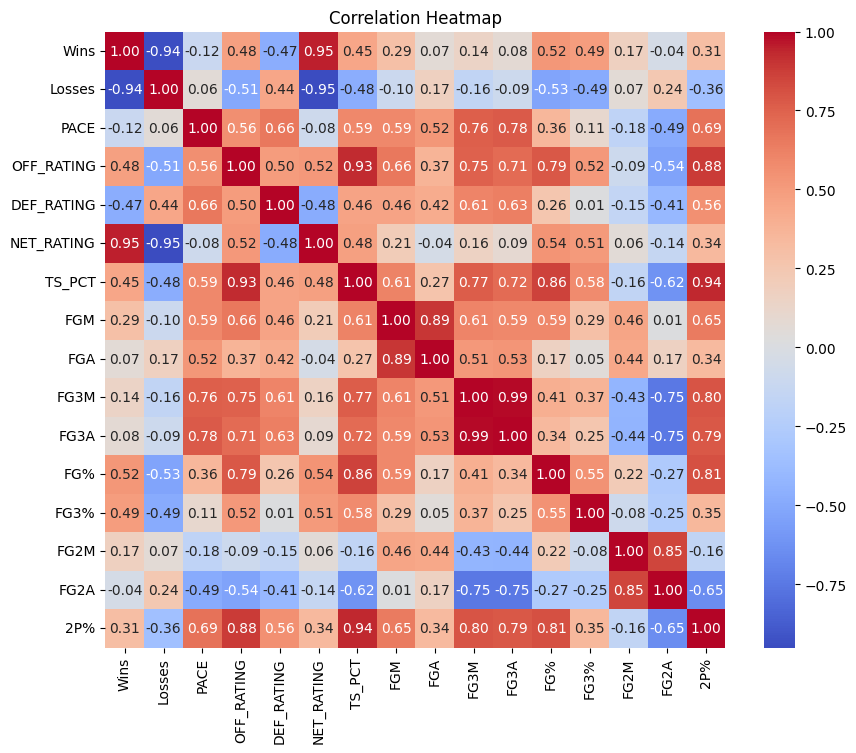

In [8]:
file_path = "cleaned_nba_data.csv"
cleaned_nba_data = pd.read_csv(file_path)

plt.figure(figsize=(10, 8))

numerical_data = cleaned_nba_data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Net Rating vs. Wins Chart**

This chart further explores the finding in the first takeaway that a team's net rating and wins are highly correlated. This chart shows that, while true, teams frequently underperform or overperform their wins implied by their net rating. The variance seems to be +/- 5 wins with some outliers.

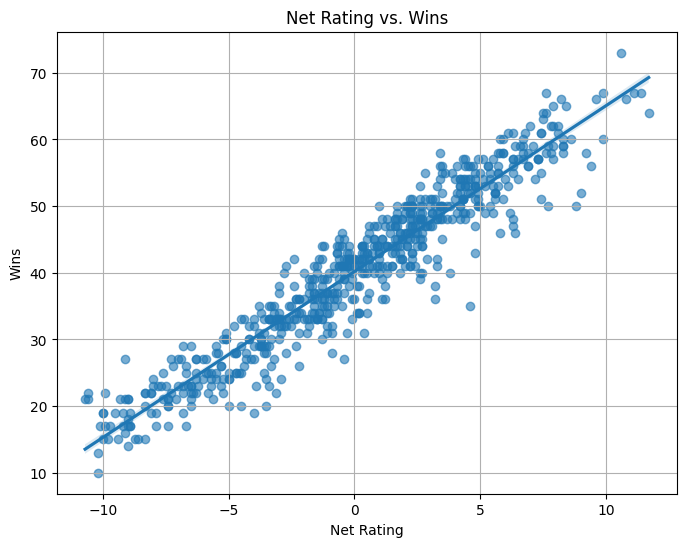

In [9]:
plt.figure(figsize=(8, 6))
sns.regplot(data=cleaned_nba_data, x="NET_RATING", y="Wins", scatter_kws={'alpha': 0.6})
plt.title("Net Rating vs. Wins")
plt.xlabel("Net Rating")
plt.ylabel("Wins")
plt.grid(True)
plt.show()

**Offensive vs. Defensive Rating Chart**

This chart shows the impact that offensive and defensive rating have on a team's wins. Teams with higher offensive rating and lower defensive ratings (better defense) tend to win more games than their peers.

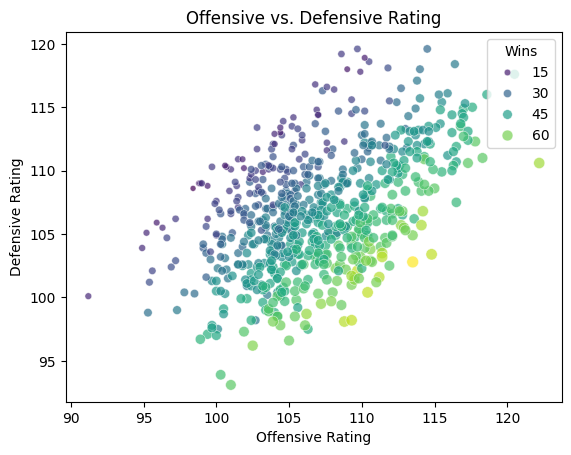

In [10]:
sns.scatterplot(
    data=cleaned_nba_data,
    x="OFF_RATING",
    y="DEF_RATING",
    hue="Wins",
    palette="viridis",
    size="Wins",
    alpha=0.7)
plt.title("Offensive vs. Defensive Rating")
plt.xlabel("Offensive Rating")
plt.ylabel("Defensive Rating")
plt.legend(title="Wins", loc="upper right")
plt.show()

**Three-Point Attempts vs. Offensive Rating Chart**

This chart illustrates the simultaneous rise of three-point attempts and offensive efficiency since the 2000 season. While the season by season rise has not entirely tracked every year, there is a clear correlation between these statistics. Three-point shooting is clearly making offenses more efficient and has been for some time.

<Figure size 1200x800 with 0 Axes>

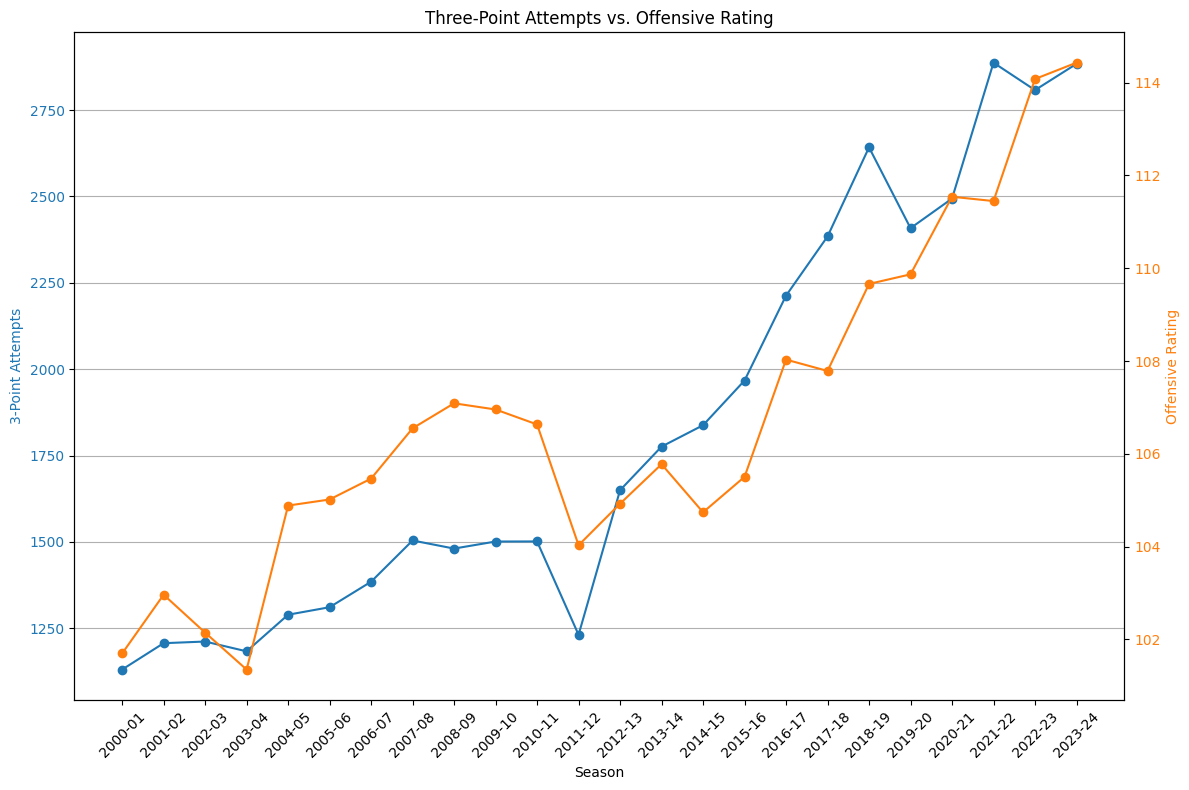

In [11]:
plt.figure(figsize=(12, 8))
three_point_scoring = cleaned_nba_data.groupby("SEASON").agg({"FG3A": "mean", "OFF_RATING": "mean"}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 8))

# First axis for 3-Point Attempts
color = "tab:blue"
ax1.set_xlabel("Season")
ax1.set_ylabel("3-Point Attempts", color=color)
ax1.plot(three_point_scoring["SEASON"], three_point_scoring["FG3A"], label="3-Point Attempts", marker="o", color=color)
ax1.tick_params(axis="y", labelcolor=color)
ax1.grid(axis="y")
ax1.tick_params(axis='x', rotation=45)

# Second axis for Offensive Rating
ax2 = ax1.twinx()
color = "tab:orange"
ax2.set_ylabel("Offensive Rating", color=color)
ax2.plot(three_point_scoring["SEASON"], three_point_scoring["OFF_RATING"], label="Offensive Rating", marker="o", color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Three-Point Attempts vs. Offensive Rating")
fig.tight_layout()
plt.show()

# **Data Analysis**

### **Model Comparison**

I decided to test whether or not the factors I highlighted above, effiecency ratings, three-point field goal attempts and pace, could create a more precise model than the one using all of the statistics in this project.

I got the RMSE of a Linear Regression model, Decision Tree Regression model and and a Random Forest Regression model to see which model would be the best performing.

Ultimately, it appears that Linear Regression model works best for both datasets. The full factor set performs better than the five factor set but the gap is not large.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
target = cleaned_nba_data["Wins"]
full_factor_set = cleaned_nba_data.drop(columns=["Wins", "Losses", "TEAM_NAME", "SEASON"])  # Use all statistics
five_factor_set = cleaned_nba_data[["OFF_RATING", "DEF_RATING", "NET_RATING", "FG3A", "PACE"]]  # Use 5 factors

# Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)}

# Function to Train and Evaluate Models
def evaluate_models(features, target, models):
    results = {}
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    for model_name, model in models.items():

        # Train the model
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        results[model_name] = rmse

    return results

full_factor_results = evaluate_models(full_factor_set, target, models)
five_factor_results = evaluate_models(five_factor_set, target, models)

# Combine Results for Comparison
comparison_df = pd.DataFrame({
    "Full Factor Set RMSE": full_factor_results,
    "Five Factor Set RMSE": five_factor_results})

# Display Results
print(comparison_df)

                   Full Factor Set RMSE  Five Factor Set RMSE
Linear Regression              3.178231              3.713124
Decision Tree                  4.266498              5.498462
Random Forest                  3.357128              4.113879


### **Celtics Testing**

In order to test these linear regression models I used my Boston Celtics as an example. As both linear regression models performed similarly, I decided to test the Celtics dataset on both.

While the predicted wins for both models were similar in most cases, the totals differed by more than one win in 2 wins in 2010-11, 2011-12, 2012-13, 2019-20, and 2020-21.

In [19]:
# Choosing Linear Regression Model
full_model = LinearRegression()
five_model = LinearRegression()

# Train Full Model
full_model.fit(full_factor_set, target)

# Train Five-Factor Model
five_model.fit(five_factor_set, target)

# Data for Boston Celtics
celtics_data = cleaned_nba_data[cleaned_nba_data["TEAM_NAME"] == "Boston Celtics"]

# Predictions using the Full Feature Set
celtics_full_factor_set = celtics_data[full_factor_set.columns]
celtics_full_predicted_wins = full_model.predict(celtics_full_factor_set)

# Predictions using the Five-Factor Feature Set
celtics_five_features = celtics_data[["OFF_RATING", "DEF_RATING", "NET_RATING", "FG3A", "PACE"]]
celtics_five_predicted_wins = five_model.predict(celtics_five_features)

celtics_data = celtics_data.copy()
celtics_data["Predicted_Wins_Full"] = celtics_full_predicted_wins
celtics_data["Predicted_Wins_Five"] = celtics_five_predicted_wins

print(celtics_data[["SEASON", "Wins", "Predicted_Wins_Full", "Predicted_Wins_Five"]])

     SEASON  Wins  Predicted_Wins_Full  Predicted_Wins_Five
24  2000-01    36            34.824927            34.850557
25  2001-02    49            45.908940            46.022527
26  2002-03    44            40.017792            40.058012
27  2003-04    36            36.935464            36.373409
28  2004-05    45            42.970747            41.733447
29  2005-06    33            36.936150            36.134021
30  2006-07    24            31.942939            31.601262
31  2007-08    66            67.143903            67.002711
32  2008-09    62            60.875766            60.204866
33  2009-10    50            50.682257            49.655001
34  2010-11    56            56.023568            54.588291
35  2011-12    39            41.200041            46.731261
36  2012-13    41            41.317580            39.490338
37  2013-14    25            29.661986            28.954768
38  2014-15    40            42.058811            40.645041
39  2015-16    48            48.620355  

### **Celtics Testing (Visualizations)**

These graphs tell an interesting story that can be matched up with narratives surrounding the team at the time. A few examples:



1.   In 2006-07, it is documented that the Celtics attempted to lose games, or "tank", in order to improve their draft position the following year. This is matched by both models saying they significantly underpeformed by their predicted wins.
2.   From the 2015-16 to 2017-18 seasons, the narrative was that the teams were overperforming their talent level due to high-level coaching and heightened performance in close games.
3. This flipped from 2018-19 to 2020-21 as the Celtics acquired several high-level players that did not play well together or get along personally and team performance suffered as a result.



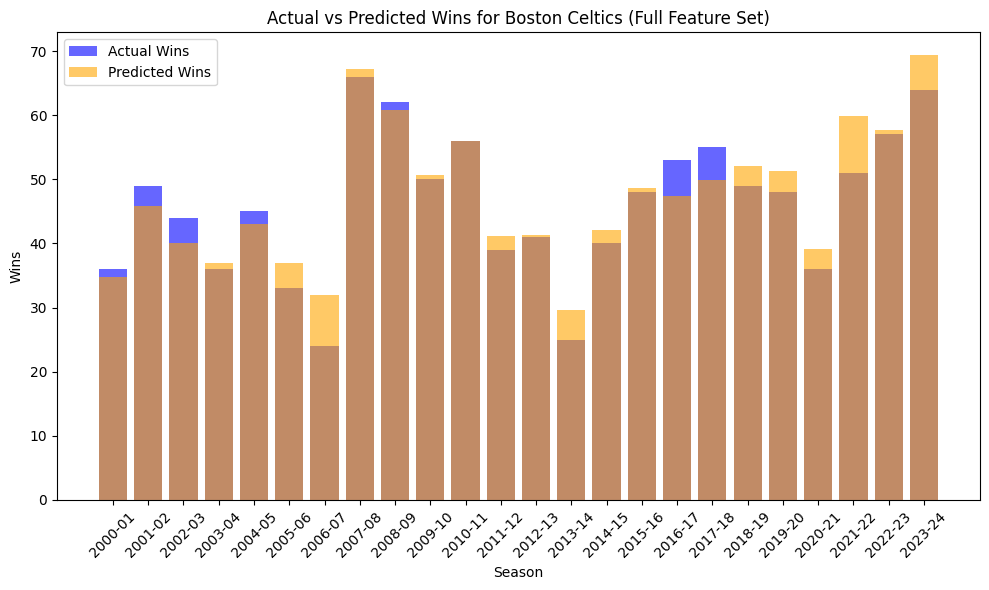

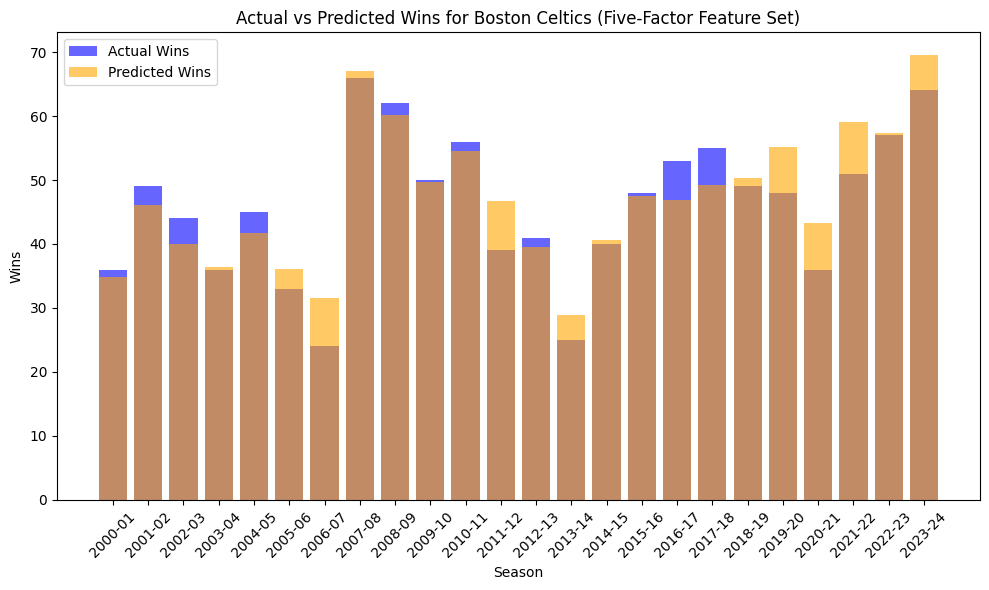

In [20]:
# Visualization for Full Feature Set
plt.figure(figsize=(10, 6))
plt.bar(celtics_data["SEASON"], celtics_data["Wins"], alpha=0.6, label="Actual Wins", color="blue")
plt.bar(celtics_data["SEASON"], celtics_data["Predicted_Wins_Full"], alpha=0.6, label="Predicted Wins", color="orange")
plt.title("Actual vs Predicted Wins for Boston Celtics (Full Feature Set)")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Visualization for Five-Factor Feature Set
plt.figure(figsize=(10, 6))
plt.bar(celtics_data["SEASON"], celtics_data["Wins"], alpha=0.6, label="Actual Wins", color="blue")
plt.bar(celtics_data["SEASON"], celtics_data["Predicted_Wins_Five"], alpha=0.6, label="Predicted Wins", color="orange")
plt.title("Actual vs Predicted Wins for Boston Celtics (Five-Factor Feature Set)")
plt.xlabel("Season")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# **Conclusion**

This project sought to understand the impact that several metrics had on team performance. By developing and comparing different machine learning models, we aimed to predict team success, measured by wins, using both a full feature set and a reduced five-factor feature set. The models were evaluated using the Root Mean Squared Error which revealed that linear regression models work best in this scenario.

These models were then tested by isolating the Boston Celtics' dataset and reviewing the season by season results. Overall, the models did a solid job of predicting a team's win/loss record based on its underlying statistics.

A more advanced version of this model would undoubtedly provide a more percise prediction and lower RMSE. However, I believe that the game-to-game and play-to-play variation of the players will lead to a higher error margin than a non-individual based dataset.

I believe that, in theory, team decisionmakers could use a model similar to this one to understand when teams are underpeforming or overperforming their underlying talent level.